In [2]:
import pandas as pd
from matplotlib import pyplot as plt

Reading the raw dataset.

In [3]:
df = pd.read_csv(open("../raw/gpt4_political_bias.csv"), encoding="utf-8")
df

,text,label
0,The government should reduce taxes significant...,0
1,Cutting welfare programs is necessary to encou...,0
2,A strong military is essential for national se...,0
3,Deregulation is crucial to promote free market...,0
4,Traditional family values should be upheld to ...,0
...,...,...
652,Promoting healthcare access is essential for r...,3
653,Balanced economic policies should promote grow...,1
654,Supporting moderate environmental policies can...,3
655,Moderate public safety initiatives should bala...,1


Renaming columns.

In [4]:
df = df.rename(columns={"text": "body", "label": "leaning"})

Categorizing the leaning column.

In [5]:
df["leaning"].unique()

array([0, 1, 2, 3, 4])

In [6]:
df["leaning"] = df["leaning"].replace({0: "right", 1: "right", 2: "center", 3: "left", 4: "left"})
df["leaning"] = df["leaning"].astype("category")

Dropping rows with missing data.

In [7]:
df = df.dropna()

Printing duplicates.

In [8]:
df[df["body"].duplicated(keep=False)]

,body,leaning
80,Providing universal childcare can support work...,left
84,Investing in mental health services is essenti...,left
98,Supporting infrastructure development is key t...,right
128,Implementing progressive tax reforms can reduc...,left
132,Promoting equal opportunities in education is ...,left
...,...,...
594,Encouraging sustainable practices through mode...,right
600,Supporting moderate innovation policies can dr...,right
601,Promoting affordable healthcare is key to redu...,left
604,Moderate public safety reforms should balance ...,right


Dropping the duplicates.

In [9]:
df = df.drop_duplicates(subset="body")

Inspecting body length.

In [10]:
df["body_length"] = df["body"].str.len()
df["body_word_count"] = df["body"].str.split().str.len()
df = df.sort_values(by="body_length")
df.head()

,body,leaning,body_length,body_word_count
304,Governance should balance economic freedom wit...,center,63,8
403,Deregulation of industries promotes competitio...,right,63,7
425,Supporting moderate tax reforms can enhance ec...,right,64,8
216,Economic policies should aim for both growth a...,center,65,10
106,Inclusive economic policies should address bot...,center,66,9


[]

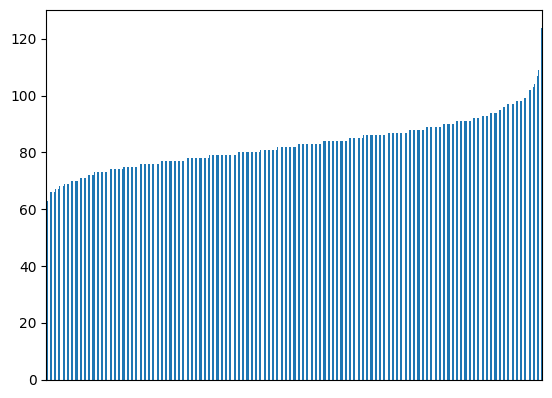

In [11]:
# Ensuring to include the last (longest) item.
df["body_length"].plot.bar().xaxis.set_ticks([])

In [12]:
df["body_length"].mean()

np.float64(82.87581699346406)

The leaning distribution.

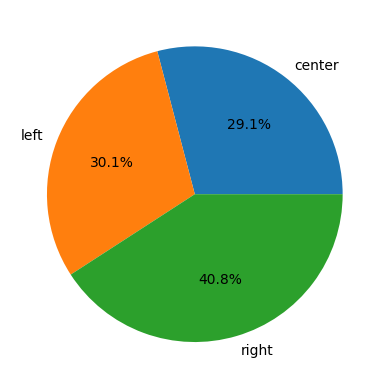

In [13]:
df.groupby("leaning", observed=True).size().plot.pie(autopct="%1.1f%%");

The distribution of body length sums per leaning.

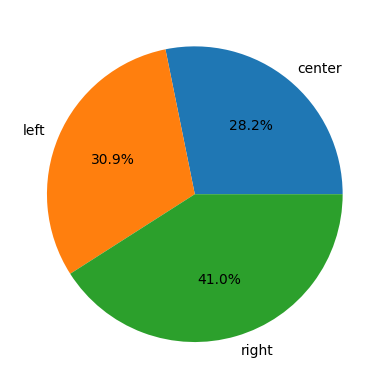

In [14]:
df.groupby("leaning", observed=True)["body_length"].sum().plot.pie(autopct="%1.1f%%", ylabel="");

Body length distribution by leaning.

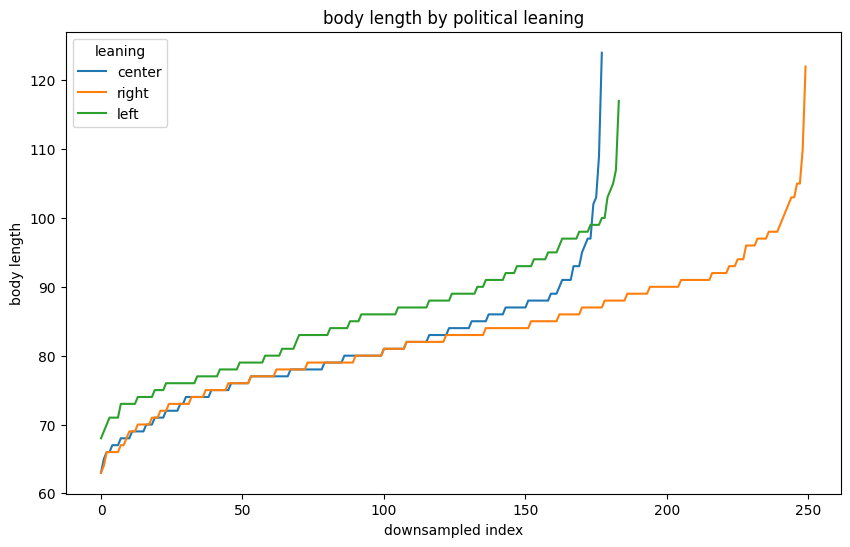

In [15]:
plt.figure(figsize=(10, 6))

for leaning in df["leaning"].unique():
    plt.plot(df[df["leaning"] == leaning].reset_index(drop=True)["body_length"], label=leaning)

plt.xlabel("downsampled index")
plt.ylabel("body length")
plt.title("body length by political leaning")
plt.legend(title="leaning")
plt.show()

In [16]:
df.to_parquet("../preprocessed/gpt4_political_bias.parquet")

612